Enter city name:  pune


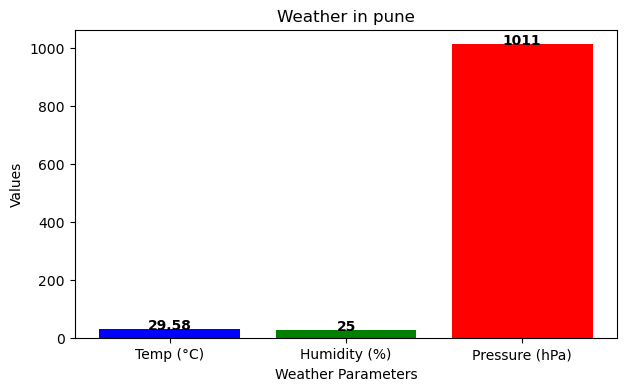

In [1]:
import requests
import matplotlib.pyplot as plt

def get_weather_data(city):
    """Fetch weather data for a given city using OpenWeatherMap API."""
    weather_api_key = "6346507bf5aa368050b683a44d788df9"  # Replace with your API key
    endpoint = "https://api.openweathermap.org/data/2.5/weather"
    params = {"q": city, "appid": weather_api_key, "units": "metric"}
    
    try:
        with requests.Session() as session:
            response = session.get(endpoint, params=params)
            response.raise_for_status()
            return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None

def visualize_weather(city, weather_data):
    """Generate a bar chart for weather details."""
    if not weather_data:
        print("No data to display.")
        return
    
    # Extract data
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    pressure = weather_data['main']['pressure']
    
    # Prepare for visualization
    labels = ['Temp (°C)', 'Humidity (%)', 'Pressure (hPa)']
    values = [temperature, humidity, pressure]
    
    plt.figure(figsize=(7, 4))
    plt.bar(labels, values, color=['blue', 'green', 'red'])
    plt.xlabel("Weather Parameters")
    plt.ylabel("Values")
    plt.title(f"Weather in {city}")
    
    # Annotate values
    for idx, val in enumerate(values):
        plt.text(idx, val + 0.5, str(val), ha='center', fontsize=10, fontweight='bold')
    
    plt.show()

if __name__ == "__main__":
    city_name = input("Enter city name: ")
    weather_info = get_weather_data(city_name)
    visualize_weather(city_name, weather_info)
